In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

olivetti_faces = fetch_openml("olivetti_faces", as_frame=False ,parser='auto')
X, y = olivetti_faces.data, olivetti_faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=40, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=80, stratify=y_train, random_state=42)

from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

In [27]:
X_projected = pca.inverse_transform(X_train_pca)
loss = np.square(X_projected - X_train).mean(axis=-1).mean()
loss

0.00019044703423926954

In [18]:
def plot_faces(faces, labels, n_cols=5):    
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

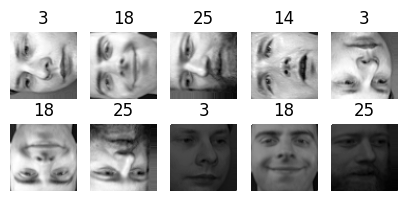

In [19]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [21]:
X_bad_faces_pca = pca.transform(X_bad_faces)
X_bad_faces_inverse_pca = pca.inverse_transform(X_bad_faces_pca)

In [28]:
loss = np.square(X_bad_faces_inverse_pca - X_bad_faces).mean(axis=-1).mean()
loss

0.0047849039926748235

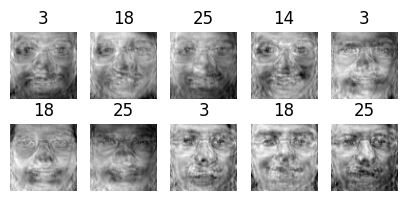

In [29]:
plot_faces(X_bad_faces_inverse_pca, y_bad)